<h1>Load Dataset<h1>

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()  

<h1>Preprocessing and Normalizaing</h1>

In [3]:
rows,cols = 28,28

#Reshaping of data into 4D array
x_train = x_train.reshape(x_train.shape[0],rows,cols,1)
x_test = x_test.reshape(x_test.shape[0],rows,cols,1)

input_shape = (rows,cols,1)


#Set type as float32 and normalize the values to [0,1]
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0



#Transform labels to one hot encoding
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10) 

<h1>Define LeNet-5  Model<h1>

In [4]:
def build_lenet(input_shape):
    #define Sequential Model
    model = tf.keras.Sequential()

    #C1 Convolution Layer
    model.add(tf.keras.layers.Conv2D(filters=6,strides=(1,1),kernel_size=(5,5),activation='tanh',input_shape=input_shape))

    #S2 SubSampling Layer
    model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2),strides=(2,2)))

    #C3 Convolution Layer
    model.add(tf.keras.layers.Conv2D(filters=16,strides=(1,1),kernel_size=(5,5),activation='tanh'))

    #S4 SubSampling Layer
    model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2),strides=(2,2)))

    #C5 Fully Connected Layer
    model.add(tf.keras.layers.Dense(units=120,activation='tanh'))

    #Flatten the output so that we can connect it with fully connected layers
    model.add(tf.keras.layers.Flatten())

    #C6 Fully Connected Layer
    model.add(tf.keras.layers.Dense(units=84,activation='tanh'))

    #Output Layer
    model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

    #Compile the Model
    model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=0.1,momentum=0.0,decay=0.0),metrics=['accuracy'])

    return model


<h1>Model Evaluation and Visualization Process<h1>

In [5]:
lenet = build_lenet(input_shape)

epochs = 10
history = lenet.fit(x_train,y_train,epochs = epochs ,batch_size=128,verbose=1)

#Check Accuracy of the Model 
loss,acc = lenet.evaluate(x_test,y_test)
print('Accuracy : ',acc)

x_train = x_train.reshape(x_train.shape[0],28,28)
print('Training Data',x_train.shape,y_train.shape)

x_test = x_test.reshape(x_test.shape[0],28,28)
print('Test Data',x_test.shape,y_test.shape)



Epoch 1/10
469/469 [==============================] - 16s 30ms/step - loss: 0.4031 - accuracy: 0.8859
Epoch 2/10
469/469 [==============================] - 16s 34ms/step - loss: 0.1850 - accuracy: 0.9451
Epoch 3/10
469/469 [==============================] - 19s 40ms/step - loss: 0.1328 - accuracy: 0.9606
Epoch 4/10
469/469 [==============================] - 15s 33ms/step - loss: 0.1036 - accuracy: 0.9694
Epoch 5/10
469/469 [==============================] - 15s 32ms/step - loss: 0.0849 - accuracy: 0.9752
Epoch 6/10
469/469 [==============================] - 18s 38ms/step - loss: 0.0724 - accuracy: 0.9789
Epoch 7/10
469/469 [==============================] - 15s 32ms/step - loss: 0.0633 - accuracy: 0.9815
Epoch 8/10
469/469 [==============================] - 15s 31ms/step - loss: 0.0560 - accuracy: 0.9835
Epoch 9/10
469/469 [==============================] - 15s 32ms/step - loss: 0.0508 - accuracy: 0.9851
Epoch 10/10
313/313 [==============================] - 2s 6ms/step - loss: 0.0497 

1/1 [==============================] - 0s 137ms/step
4


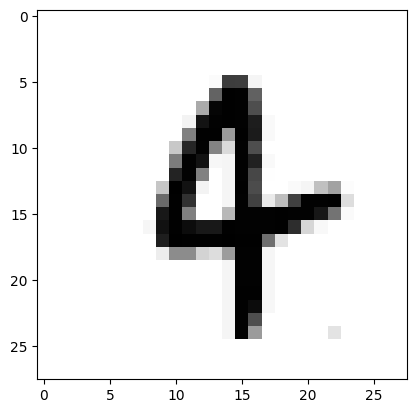

In [6]:
#Plot the Image
image_index = 5525
plt.imshow(x_test[image_index].reshape(28,28),cmap='Greys')

#make prediction
pred = lenet.predict(x_test[image_index].reshape(1,rows,cols,1))
print(pred.argmax())